## Формирование сэмпла новостей для сравнения ##

Берем сэмпл из 30 новостей, взятых из файла экспорта телеграм канало РИА Новости (с 01.06.2022 по 09.10.2022)

In [1]:
import numpy as np
import pandas as pd

json_filename = "../data/external/tg_chatexport__rian_ru__20220601-20221009.json.zip"
df_news = pd.read_json(json_filename)
df_news = df_news["messages"].apply(pd.Series)
df_news.sample(5)

,id,type,date,date_unixtime,from,from_id,reply_to_message_id,text,text_entities,edited,edited_unixtime,file,thumbnail,media_type,mime_type,duration_seconds,width,height,photo
3633,169165,message,2022-06-29T16:08:05,1656508085,РИА Новости,channel1101170442,NaN,Новая стратегическая концепция НАТО. Полный те...,"[{'type': 'plain', 'text': 'Новая стратегическ...",NaN,NaN,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,NaN,application/pdf,NaN,NaN,NaN,NaN
4680,170219,message,2022-07-07T16:59:46,1657202386,РИА Новости,channel1101170442,170159.0,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,960.0,1280.0,(File not included. Change data exporting sett...
12715,178282,message,2022-09-19T04:01:45,1663549305,РИА Новости,channel1101170442,NaN,Среди иностранных наемников в Донбассе все чащ...,"[{'type': 'plain', 'text': 'Среди иностранных ...",NaN,NaN,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,video_file,video/quicktime,48.0,854.0,480.0,NaN
13180,178747,message,2022-09-21T17:33:57,1663770837,РИА Новости,channel1101170442,NaN,НАТО обсуждает с оборонными предприятиями уско...,"[{'type': 'plain', 'text': 'НАТО обсуждает с о...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,166473,message,2022-06-08T13:51:58,1654685518,РИА Новости,channel1101170442,166404.0,Песков: в Кремле не обладают достаточной инфор...,"[{'type': 'plain', 'text': 'Песков: в Кремле н...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_news.type.value_counts(dropna=False)

message    15450
Name: type, dtype: int64

In [3]:
df_news.mime_type.value_counts(dropna=False)

NaN                12493
video/mp4           2828
video/quicktime      124
application/pdf        5
Name: mime_type, dtype: int64

In [4]:
# Для текущего ноутбука, оставляем только:
#  - сообщения без доп контента (например видео)
#  - сообщения не являющиеся reply на другие сообщения
#  - в поле text содержится объект типа str, а не list (как в части новостей)
#  - поле текст не пустое
#  - дата сообщения и текст
df_news = df_news[((df_news.mime_type.isnull()) & 
                   (df_news.reply_to_message_id.isnull()) & 
                   (df_news.text.map(type) == str) &
                   (df_news.text != ''))]
df_news = df_news[["date", "text"]]
df_news

,date,text
1,2022-06-01T01:41:33,Российские аэропорты попросили власти открыть ...
2,2022-06-01T02:18:16,Испанец Рафаэль Надаль (5-й в мире) вышел в по...
4,2022-06-01T03:08:07,США в среду представят новый пакет военной пом...
8,2022-06-01T04:12:01,СК предлагает изменить порядок регистрации в с...
10,2022-06-01T05:12:01,Компании России и Китая справляются с возникши...
...,...,...
15440,2022-10-09T10:59:57,Движение грузовых и пассажирских поездов по Кр...
15443,2022-10-09T11:26:43,Пилот из Нидерландов Макс Ферстаппен (выступае...
15446,2022-10-09T12:01:34,"Отправлены все поезда, задержанные в Крыму из-..."
15447,2022-10-09T12:05:40,Минобороны Киргизии сообщило об отмене учений ...


<AxesSubplot:>

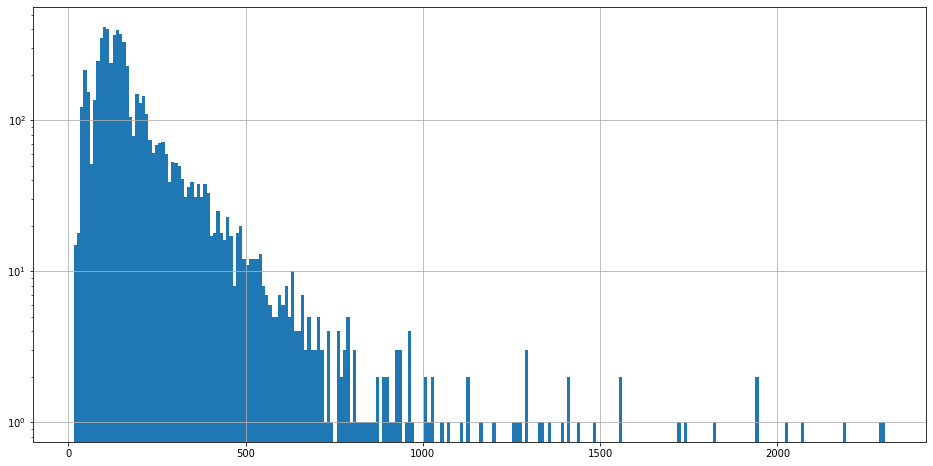

In [5]:
df_news.text.map(len).hist(bins=250, log=True, figsize=(16,8))

In [6]:
# df_news[df_news.text.map(len) < 10].text.map(len).value_counts()

In [7]:
# df_news_sample = df_news.sample(30)
# print('\n--------------------\n'.join(df_news_sample.text.to_list()))
# df_news_sample.index

In [8]:
sample_index = [10310, 10393,  8861, 13481, 13926,  1438,  8554,  9460,  6249,
             1893, 14808,  7680,  3214,   720, 15226,   887, 13284,  3291,
             5576, 14154, 10615,  7154, 12205, 12156,  2070,   796,  4772,
            14467,  1404,  2666]
news_sample01 = df_news.loc[sample_index].text.to_list()
print('\n--------------------\n'.join(news_sample01))

Китай остановил импорт мясной продукции американской Tyson Fresh Meat – одной из крупнейших продовольственных компаний в мире. Причиной названо несоответствие китайским стандартам качества.
--------------------
Почти половина коррупции в России приходится на два федеральных округа: Приволжье (24,2%) и центральную Россию (21,5%), следует из данных Генпрокуратуры за 7 месяцев.

Далее Юг (14,6%), Сибирь (10,5%), Северный Кавказ (8,8%), Урал (тоже 8,8%), Северо-Запад (6,4%) и Дальний Восток (5,3%).
--------------------
Гендиректором "Победы" назначен бывший первый замгендиректора "Авроры" Тыщук
--------------------
Урожай зерновых в России в 2022 может составить рекордные 142 млн тонн, сохраняются все поставки продовольствия в дружественные страны, даже наращиваются в ряд недружественных, рассказала вице-премьер Абрамченко
--------------------
Победители конкурса имени Андрея Стенина за 2022 объявлены в Москве, среди них конкурсанты из Гватемалы, Индии, Бангладеш, Ирана, Италии.

В номинац

In [9]:
news_sample02 = [
'''Британия и ЕС согласовали скоординированный запрет на страхование судов, перевозящих российскую нефть, пишет FT.''',
'''Испанец Рафаэль Надаль (5-й в мире) вышел в полуфинал "Ролан Гаррос", обыграв первую ракетку мира Новака Джоковича (Сербия) - 6:2, 4:6, 6:2, 7:6 (7:4).\n\nЭто была 59-я очная встреча соперников, после нее у Надаля стало 29 побед.\n\nНадаль, который выигрывал "Ролан Гаррос" 13 раз, в полуфинале сыграет с Александром Зверевым (Германия, 3-я ракетка мира).''',
'''США в среду представят новый пакет военной помощи Украине, который будет включать ракетные системы HIMARS, контрбатарейные и противовоздушные РЛС, ПТРК Javelin, вертолеты, автомобили, сообщил Белый дом. Пакет военной помощи оценивается примерно в $700 млн.''',
'''Компании России и Китая справляются с возникшими из-за санкций Запада издержками, многие в КНР расценили уход западных фирм с российского рынка как хорошую возможность для своего бизнеса, заявил РИА Новости российский генконсул в Харбине.''',
'''Российская хакерская группа RaHDIt выложила в открытый доступ данные 700 сотрудников СБУ с их фотографиями, телефонами и домашними адресами. Подлинность данных подтвердили РИА Новости в российских спецслужбах.\n\nПомимо общих данных хакеры раскрыли ряд "увлечений" украинских спецслужбистов, например азартные игры, посещение свингерских вечеринок и участие в ЛГБТ-оргиях.''',
'''Обеспечить бесплатный проезд по трассе М-4 "Дон" без соответствующих компенсаций сейчас невозможно, но рассматривается запуск программ лояльности, сообщили в "Автодоре"''',
'''Санкции против России прямого влияния на программу социальной газификации не оказывают, причин для ее сдвигов нет, заявил РИА Новости Турчак''',
'''Захарова о планах включить патриарха Кирилла в черный список Евросоюза: "Они уже не понимают, насколько это"''',
'''Совокупное состояние богатейших бизнесменов России упало с начала года на $41,4 млрд а больше всех потерял совладелец "Новатэка" и "Сибура" Тимченко, подсчитало РИА Новости"''',
'''Цикл испытаний  гиперзвуковой ракеты Циркон завершен, в ходе пусков с фрегата Адмирал Горшков подтверждена готовность и самого носителя, и нового оружия объявил командующий Северным флотом''',
'''Россия и Китай будут наращивать использование рубля и юаня в расчетах, рассказал Лавров\n\n🔻 По его словам, Москва высоко ценит "взвешенную, непредвзятую" позицию Пекина по Украине и по расширению НАТО\n\n🔻 Энергетическое партнерство двух стран приобрело стратегический характер, реализуются крупные проекты, заявил Лавров\n\n🔻 Китай и Россия могут "принести позитивную энергию" глобальному управлению, "плечом к плечу поддерживая международную справедливость", считает посол КНР в России Чжан Ханьхуэй\n\n🔻 Спецпредставитель правительства КНР по Евразии Ли Хуэй призвал расширять двустороннее сотрудничество в области высоких технологий\n\n🔻 Страны НАТО сейчас заходят в Азию, создавая точки напряжённости по границам России и Китая, пытаются расколоть АСЕАН, отметил замглавы МИД РФ Моргулов\n\n🔻 Он же обратил внимание на создание Западом в Индо-Тихоокеанском регионе "закрытых форматов с силовым функционалом" (видимо, речь об AUKUS), увеличивающих риск конфликтов.''',
]
print('\n--------------------\n'.join(news_sample02))

Британия и ЕС согласовали скоординированный запрет на страхование судов, перевозящих российскую нефть, пишет FT.
--------------------
Испанец Рафаэль Надаль (5-й в мире) вышел в полуфинал "Ролан Гаррос", обыграв первую ракетку мира Новака Джоковича (Сербия) - 6:2, 4:6, 6:2, 7:6 (7:4).

Это была 59-я очная встреча соперников, после нее у Надаля стало 29 побед.

Надаль, который выигрывал "Ролан Гаррос" 13 раз, в полуфинале сыграет с Александром Зверевым (Германия, 3-я ракетка мира).
--------------------
США в среду представят новый пакет военной помощи Украине, который будет включать ракетные системы HIMARS, контрбатарейные и противовоздушные РЛС, ПТРК Javelin, вертолеты, автомобили, сообщил Белый дом. Пакет военной помощи оценивается примерно в $700 млн.
--------------------
Компании России и Китая справляются с возникшими из-за санкций Запада издержками, многие в КНР расценили уход западных фирм с российского рынка как хорошую возможность для своего бизнеса, заявил РИА Новости российск

## Проверка функционала stanza ##
https://stanfordnlp.github.io/stanza/

https://github.com/stanfordnlp/stanza

In [10]:
# !pip install stanza

In [11]:
import stanza
from tqdm import tqdm

In [12]:
nlp = stanza.Pipeline(lang='ru', processors='tokenize,pos,lemma,ner,depparse')

2022-10-11 14:04:33 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-10-11 14:04:37 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

2022-10-11 14:04:37 INFO: Use device: cpu
2022-10-11 14:04:37 INFO: Loading: tokenize
2022-10-11 14:04:37 INFO: Loading: pos
2022-10-11 14:04:37 INFO: Loading: lemma
2022-10-11 14:04:37 INFO: Loading: depparse
2022-10-11 14:04:37 INFO: Loading: ner
2022-10-11 14:04:38 INFO: Done loading processors!


In [13]:
def stanza_processing_and_print(texts: list[str], stanza_pipeline) -> None:
    '''Stanza processing texts and print results (Entities & Dependencies)'''
    # stanza processing
    stanza_docs = [stanza_pipeline(text) for text in tqdm(texts)]
    
    # output results
    for text, doc in zip(texts, stanza_docs):
        print("\nИсходый текст новости:")
        print(text)
        print("\nEntities (именованные сущности):")
        print(pd.DataFrame([ent.to_dict() for ent in doc.entities]))
        print("\nDependencies (зависимости):")
        depend_list = []
        for sent in doc.sentences: 
            for word in sent.words:
                depend_list.append({
                 "id": word.id,
                 "word": word.text,
                 "head id": word.head,
                 "head": sent.words[word.head-1].text if word.head > 0 else "root",
                 "deprel": word.deprel
                })
        print(pd.DataFrame(depend_list).to_string(index=False))
        #for sent in doc.sentences: sent.print_dependencies()
        print("\n============================================================")
        print("============================================================")
        print("============================================================\n")

In [14]:
stanza_processing_and_print(news_sample01, nlp)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:22<00:00,  1.35it/s]


Исходый текст новости:
Китай остановил импорт мясной продукции американской Tyson Fresh Meat – одной из крупнейших продовольственных компаний в мире. Причиной названо несоответствие китайским стандартам качества.

Entities (именованные сущности):
               text  type  start_char  end_char
0             Китай   LOC           0         5
1  Tyson Fresh Meat   ORG          53        69
2         китайским  MISC         159       168

Dependencies (зависимости):
 id              word  head id           head       deprel
  1             Китай        2      остановил        nsubj
  2         остановил        0           root         root
  3            импорт        2      остановил          obj
  4            мясной        5      продукции         amod
  5         продукции        3         импорт         nmod
  6      американской        5      продукции         amod
  7             Tyson        5      продукции flat:foreign
  8             Fresh        5      продукции flat:foreign


In [15]:
stanza_processing_and_print(news_sample02, nlp)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:10<00:00,  1.09it/s]


Исходый текст новости:
Британия и ЕС согласовали скоординированный запрет на страхование судов, перевозящих российскую нефть, пишет FT.

Entities (именованные сущности):
       text  type  start_char  end_char
0  Британия   LOC           0         8
1        ЕС   ORG          11        13
2        FT  MISC         109       111

Dependencies (зависимости):
 id              word  head id        head    deprel
  1          Британия        4 согласовали     nsubj
  2                 и        3          ЕС        cc
  3                ЕС        1    Британия      conj
  4       согласовали        0        root      root
  5 скоординированный        6      запрет      amod
  6            запрет        4 согласовали       obj
  7                на        8 страхование      case
  8       страхование        6      запрет      nmod
  9             судов        8 страхование      nmod
 10                 ,       11 перевозящих     punct
 11       перевозящих        9       судов       acl
 12 

**Краткие выводы по stanza (применимость на нашем домене - новости на русском языке, из телеграмм каналов):** 
- качество формирования именованных сущностей -> удовлетворительное;
- качество формирования зависимостей - удовлетворительное, но применительно к нашей задаче -> предположение, о возможности, формирования макимально емких триплетов (передающих основную суть новости), на основе постобработки простыми правилами результатов работы Stanza (Entities & Dependencies), без предобработки видится затруднительным, основные причины:
  - новости часто состоят из нескольких взаимозависимых предложений, но суть, в большинстве случаев, можно выразить 1-3 триплетами;
  - Stanza тегирует зависимости очень подробно (используется 37 универсальных тегов), сопоставление с ручной разметкой триплетов из нескольких новостей, показывает, что в триплеты попадают разнообразные наборы тегов, которые сложно описать простыми правилами;
- решение о необходимости проведения дополнительного анализа применимости станза, необходимо принять после:
  - проведения экспериментов с предварительной саммаризацией новостей (существующими предобученными моделями), для их сжатия в максимально компактные предложения (по сути заголовки), при этом может быть сформировано несколько наиболее подходящих вариантов, которые уже будут подаваться на вход stanza
  - окончания экспериментов с аналогами stanza (spacy, spacy-natasha)

## Воспроизведение статьи "Простой граф знаний на текстовых данных" ##

Простой граф знаний на текстовых данных (11.06.2021 Сурняев Даниил ,г. Ростов-на-Дону)

https://newtechaudit.ru/prostoj-graf-znanij-na-tekstovyh-dannyh/

In [16]:
# !pip install nltk

In [17]:
import pandas as pd
from tqdm import tqdm
import stanza
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ieklein\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Разобьём тексты на предложения
sentences = [sent for corp in news_sample01 for sent in sent_tokenize(corp, language="russian")]

In [19]:
# Инициализируем различные препроцессоры stanza с помощью метода Pipeline
nlp = stanza.Pipeline(lang='ru',
                      processors='tokenize,pos,lemma,ner,depparse')

2022-10-11 14:05:14 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2022-10-11 14:05:17 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

2022-10-11 14:05:17 INFO: Use device: cpu
2022-10-11 14:05:17 INFO: Loading: tokenize
2022-10-11 14:05:17 INFO: Loading: pos
2022-10-11 14:05:18 INFO: Loading: lemma
2022-10-11 14:05:18 INFO: Loading: depparse
2022-10-11 14:05:18 INFO: Loading: ner
2022-10-11 14:05:22 INFO: Done loading processors!


In [20]:
triplets = []
for s in tqdm(sentences):
    doc = nlp(s)
    #print(doc.entities)
    for sent in doc.sentences:
        entities = [ent.text for ent in sent.ents]
        res_d = dict()
        temp_d = dict()
        for word in sent.words:
            temp_d[word.text] = {"head": sent.words[word.head-1].text, "dep": word.deprel, "id": word.id}
        for k in temp_d.keys():
            nmod_1 = ""
            nmod_2 = ""
            if (temp_d[k]["dep"] in ["nsubj", "nsubj:pass"]) & (k in entities):
                res_d[k] = {"head": temp_d[k]["head"]}
                
                for k_0 in temp_d.keys():
                    if (temp_d[k_0]["dep"] in ["obj", "obl"]) &\
                       (temp_d[k_0]["head"] == res_d[k]["head"]) &\
                        (temp_d[k_0]["id"] > temp_d[res_d[k]["head"]]["id"]):
                        res_d[k]["obj"] = k_0
                        break
                
                for k_1 in temp_d.keys():
                    if (temp_d[k_1]["head"] == res_d[k]["head"]) & (k_1 == "не"):
                        res_d[k]["head"] = "не "+res_d[k]["head"]
                
                if "obj" in res_d[k].keys():
                    for k_4 in temp_d.keys():
                        if (temp_d[k_4]["dep"] =="nmod") &\
                           (temp_d[k_4]["head"] == res_d[k]["obj"]):
                            nmod_1 = k_4
                            break
                            
                    for k_5 in temp_d.keys():
                        if (temp_d[k_5]["dep"] =="nummod") &\
                           (temp_d[k_5]["head"] == nmod_1):
                            nmod_2 = k_5
                            break
                    res_d[k]["obj"] = res_d[k]["obj"]+" "+nmod_2+" "+nmod_1

        if len(res_d) > 0:
            triplets.append([s, res_d])

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:26<00:00,  1.83it/s]


In [21]:
clear_triplets = []
for tr in triplets:
    for k in tr[1].keys():
        if "obj" in tr[1][k].keys():
            clear_triplets.append([tr[0], k, tr[1][k]['head'], tr[1][k]['obj']])
clear_triplets

[['Китай остановил импорт мясной продукции американской Tyson Fresh Meat – одной из крупнейших продовольственных компаний в мире.',
  'Китай',
  'остановил',
  'импорт  продукции'],
 ['Почти половина коррупции в России приходится на два федеральных округа: Приволжье (24,2%) и центральную Россию (21,5%), следует из данных Генпрокуратуры за 7 месяцев.',
  'Приволжье',
  'следует',
  'данных  Генпрокуратуры'],
 ['При этом реже всего жалуются россияне старше 45 лет и те, кто зарабатывает от 80 тыс рублей в месяц (по 27%).',
  'россияне',
  'жалуются',
  'старше  '],
 ['ДНР не обращалась к России с просьбой о поставках ракет, в том числе "Искандеров", сказал Пушилин РИА Новости',
  'ДНР',
  'не обращалась',
  'России  '],
 ['Американский президент заявил с трибуны Объединенных наций, что США выступают за расширение числа как постоянных, так и непостоянных членов Совбеза.',
  'США',
  'выступают',
  'расширение  числа'],
 ['Путин подписал закон, исключив из законодательства понятие "услуга в

**Краткие выводы по применимости алгоритма формирования триплетов (из статьи) на нашем домене (новости из телеграм каналов):** 
- видим, что триплеты формируются только для 5-10% исходных предложений, что является неудовлетворительным результатом;
- качество триплетов для нашего домена новостей неудовлетворительное.

Код для нашего домена, формирующий триплеты из выходных данных, полученных после обработки stanza (или аналогичной библиотеки) необходимо реализовать самостоятельно.